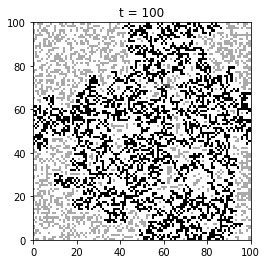

In [12]:
import matplotlib

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def init(p):
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

def run_sim(p,time):
    init(p)
    for i in range(time):
        step()
    draw()
run_sim(0.5,100)

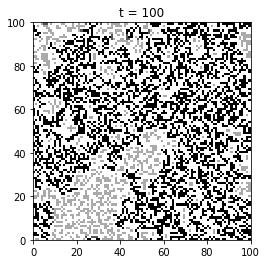

In [13]:
run_sim(1,100)

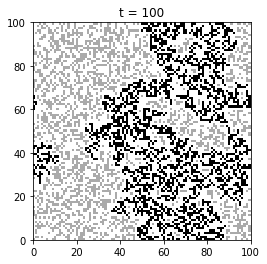

In [14]:
run_sim(0.9,100)

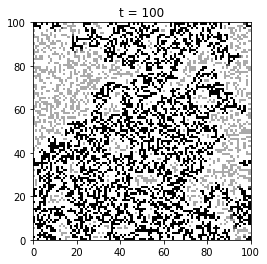

In [15]:
run_sim(0.2,100)

Comment: By changing the density parameter, when increasing the density, the fire is more spreadout, which means the phenomenon of fire increases with high density.

### Sayama Exercise 12.8
When doing 1x1 to 2x2, we can see all the possiblities of 2x2 when ganaralizing the space. However, when expanding to 4x4 from 2x2, we can see that only one possibility of 2x2 is used to see the phenomenon of 4x4 space, which means it does not make sense. Therefore, it is not correct to assume that the relationship between 1x1 and 2x2 can be applied to the relationship between 2x2 and 4x4.